### ⬇️ Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import joblib

### 📂 Data Loading

In [2]:
df = pd.read_csv("credit_card_transactions.csv")
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

 The credit card fraud data is an imbalanced dataset with majority of the fraud flag being zero(negative)

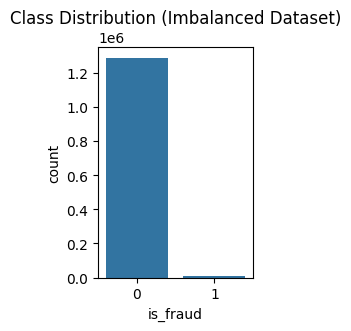

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [5]:
plt.figure(figsize=(2,3))
sns.countplot(x='is_fraud', data=df)
plt.title("Class Distribution (Imbalanced Dataset)")
plt.show()

df['is_fraud'].value_counts()

### 🧹Data Pre-processing

In [3]:
# droping useless columns
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time', 'merch_zipcode'], axis=1, inplace=True)

In [4]:
cat_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
cat_data = df[cat_cols]

for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  joblib.dump(le, f"encoders/le_encoder_{col}.pkl")

In [8]:
"Missing values per column:\n", df.isnull().sum()

('Missing values per column:\n',
 trans_date_trans_time    0
 merchant                 0
 category                 0
 amt                      0
 gender                   0
 city                     0
 state                    0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64)

### 🔧Feature Engineering

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Parsing day, month, weekday
df['Day'] = df['trans_date_trans_time'].dt.day
df['Month'] = df['trans_date_trans_time'].dt.month
df['Weekday'] = df['trans_date_trans_time'].dt.weekday
df = df.drop('trans_date_trans_time', axis=1)

In [10]:
from datetime import date
current_year = date.today().year

df['dob'] = pd.to_datetime(df['dob'])
df['age'] = current_year - df['dob'].dt.year
df = df.drop('dob', axis=1)

In [11]:
R = 6371  # Earth radius in km
lat1 = np.radians(df['lat'])
lon1 = np.radians(df['long'])
lat2 = np.radians(df['merch_lat'])
lon2 = np.radians(df['merch_long'])

df['distance'] = 2 * R * np.arcsin(
    np.sqrt(
        np.sin((lat2 - lat1) / 2)**2 +
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1) / 2)**2
    )
)

df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True, ignore_index=True)

In [1]:
df

NameError: name 'df' is not defined

<Axes: >

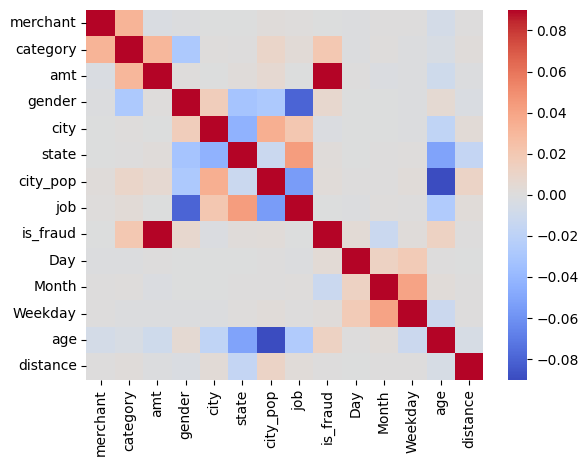

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-0.09, vmax=0.09, annot=False)

### ⚖️ Seperating features and target column

In [14]:
# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [15]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [17]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### 🤖 Training over Imbalanced Dataset

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46, class_weight='balanced')

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

### 📈 Model Evaluation

In [21]:
import warnings
warnings.filterwarnings("ignore")

print("Logistic Regression Results:")
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_log))
print('------------------------------------------------')

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))
print('------------------------------------------------')

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Logistic Regression Results:
ROC-AUC: 0.6194947348411173
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.08      0.77      0.14      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335

------------------------------------------------
Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.94      0.66      0.77      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.83      0.89    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC: 0.987899706444427
------------------------------------------------
XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1   

### 💡 Hyperparameter Tunning

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10)
}

random_search_RFC = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          
    cv=2,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_RFC.fit(X_train, y_train)

print('Hyperparameter Tuning for Random Fores Classifier:')
print("Best Parameters:", random_search_RFC.best_params_)
print("Best F1 Score:", random_search_RFC.best_score_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Hyperparameter Tuning for Random Fores Classifier:
Best Parameters: {'max_depth': 25, 'min_samples_split': 8, 'n_estimators': 171}
Best F1 Score: 0.7321904962801589


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)


print('Hyperparameter Tunning for XGBoost Classifier: ')
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best F1 Score:", grid_search_xgb.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Hyperparameter Tunning for XGBoost Classifier: 
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score: 0.7929520691480517


     Feature  Importance
1   category    0.502546
2        amt    0.315127
3     gender    0.060994
11       age    0.030613
6   city_pop    0.016546
9      Month    0.011696
5      state    0.010657
7        job    0.010530
4       city    0.010441
8        Day    0.010321
10   Weekday    0.009115
0   merchant    0.005794
12  distance    0.005620


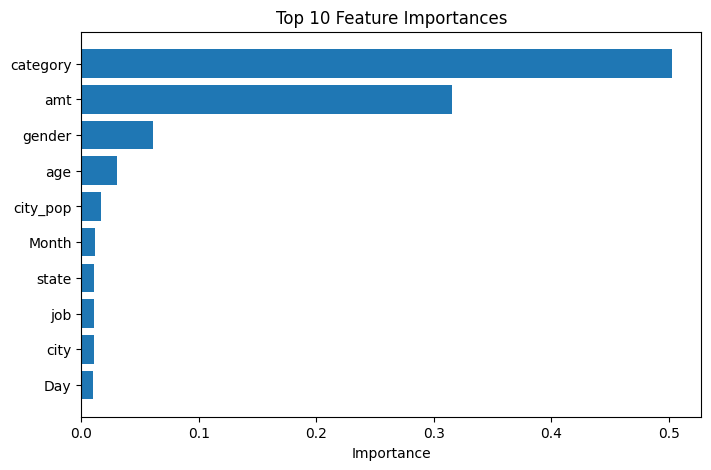

In [26]:
importances = grid_search_xgb.best_estimator_.feature_importances_
features = X_train.columns

# Create DataFrame
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

# Plot top 10
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()

In fraud detection, the data is usually very imbalanced, there are many normal transactions and only a few frauds.
In such cases, accuracy or ROC-AUC can be misleading because a model that mostly predicts “not fraud” can still look good. The F1-score gives a better picture because it balances both precision (how many predicted frauds are correct) and recall (how many actual frauds are caught). So, using F1-score helps us choose the model that truly performs well at detecting frauds without too many false alarms.

In [27]:
final_model = grid_search_xgb.best_estimator_

### 🛠️ Model Deployment

In [2]:
import joblib

In [ ]:
joblib.dump(final_model, 'fraud_model.pkl')

['fraud_model.pkl']

In [ ]:
feature_means = df.mean().to_dict()
joblib.dump(feature_means, 'feature_means.pkl')

['feature_means.pkl']